In [1]:
from utils.visualization import *
import os

In [13]:
def visualize_molecule(npz_file):
    
    print(f"Visualizing molecule from {npz_file}...")

    with np.load(npz_file) as data:
        atom_pos = data['atom_pos']
        atomic_numbers = data['atomic_numbers']
        frequencies = data['frequencies']
        spectrums = data['spectrums']



    channels = uniform_channels(spectrums, frequencies)
    channels_glob = channels
    channels = minmax(channels)


    # Visualize the molecule
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    molecule_visualization_image(np.array(atom_pos), np.array(atomic_numbers), axes=axs[0])
    axs[0].set_title("Original Molecule")
    axs[0].set_frame_on(True)

    filted_atom_pos, filtered_atomic_numbers = remove_disk(atom_pos, atomic_numbers)
    molecule_visualization_image(np.array(filted_atom_pos), np.array(filtered_atomic_numbers), axes=axs[1])
    axs[1].set_title("Filtered Molecule")
    axs[1].set_frame_on(True)


    line_x = 0.5  # Middle of the figure (since we have two subplots)
    fig.add_artist(plt.Line2D([line_x, line_x], [0, 1], color='black', linewidth=2, transform=fig.transFigure))
    plt.tight_layout()



    # Visualize the average of the channels
    print(spectrums.shape)
    average_image = np.zeros((spectrums.shape[0],spectrums.shape[1], 1))  # Initialize an empty average image
    non_empty_channels = [i for i in range(channels.shape[2]) if np.any(channels[:, :, i] != 0)]
    non_empty_channel_images = channels[:, :, non_empty_channels]
    average_image[:, :, 0] = np.mean(non_empty_channel_images, axis=2)
    average_image_log = np.log1p(average_image[:, :, 0])  # For visualization


    plt.figure(figsize=(4, 4))
    ax = plt.gca()

    filtered_atom_pos, filtered_atomic_numbers = remove_disk(atom_pos, atomic_numbers)
    overlay_molecule_on_image(filtered_atom_pos, filtered_atomic_numbers, average_image_log, ax, grid_size=18.0)
    
    basename = os.path.splitext(os.path.basename(npz_file))[0]
    plt.title(f"Molecule {basename} Overlaid on Average Channel")
    plt.tight_layout()
    plt.show()



    # Visualizing each channel

    n_cols = 5
    n_rows = int(np.ceil(len(non_empty_channels) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
    axes = axes.flatten()

    for i, idx in enumerate(non_empty_channels):
        overlay_molecule_on_image(filtered_atom_pos, filtered_atomic_numbers, channels[:, :, idx], axes[i], grid_size=18.0)

        indices = (frequencies > (idx * 10 + 1)) & (frequencies < ((idx + 1) * 10 + 1))
        t = ', '.join([str(np.round(frequencies[j],2)) for j in range(len(frequencies)) if indices[j]]) + ' cmˆ-1'
        #axes[i].set_title(f"Channel {idx}, f={frequencies[indices]}")
        axes[i].set_title(f"f={t}")

    # Hide extra subplots
    for j in range(len(non_empty_channels), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


    n_cols = 5
    n_rows = int(np.ceil(len(non_empty_channels) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
    axes = axes.flatten()

    for i, idx in enumerate(non_empty_channels):
        image = channels_glob[:, :, idx]
        grid_size = 18.0
        axes[i].imshow(image, cmap='jet', extent=(-grid_size/2, grid_size/2, -grid_size/2, grid_size/2), origin='lower')
        indices = (frequencies > (idx * 10 + 1)) & (frequencies < ((idx + 1) * 10 + 1))
        t = ', '.join([str(np.round(frequencies[j],2)) for j in range(len(frequencies)) if indices[j]]) + ' cmˆ-1'
        axes[i].axis('off')

    # Hide extra subplots
    for j in range(len(non_empty_channels), len(axes)):
        axes[j].axis('off')

    plt.savefig(f"visualization.svg", dpi=600)
    plt.tight_layout()
    plt.show()

    





Visualizing molecule from /scratch/phys/sin/sethih1/data_files/old/second_group_images_256/7847.npz...
(256, 256, 18)


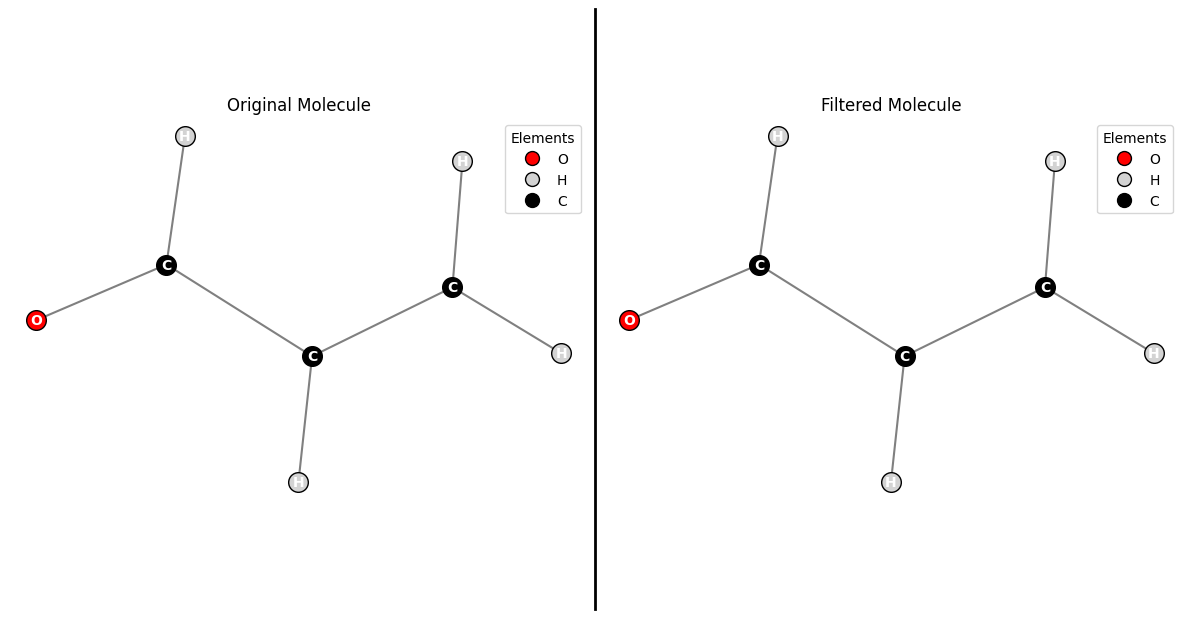

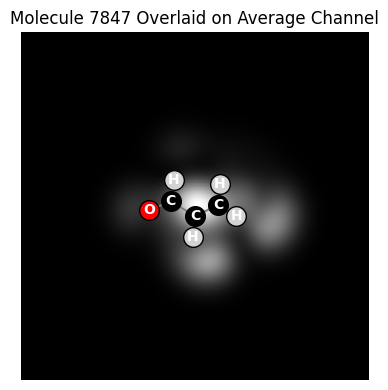

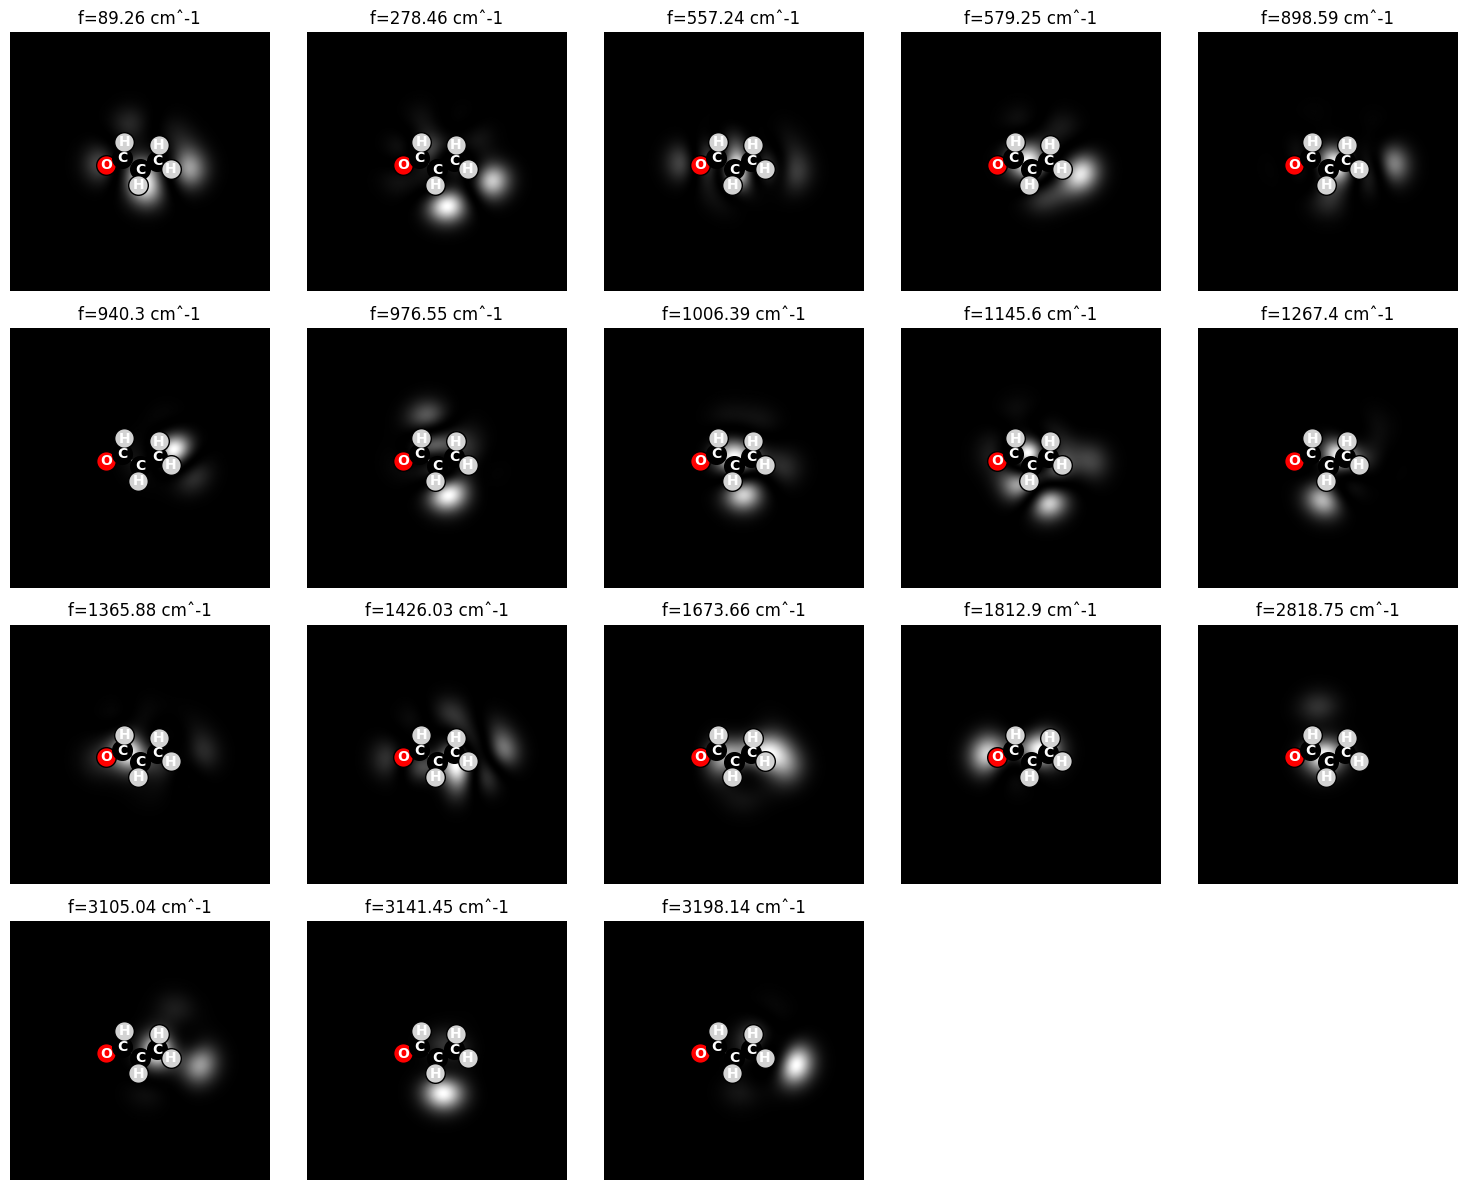

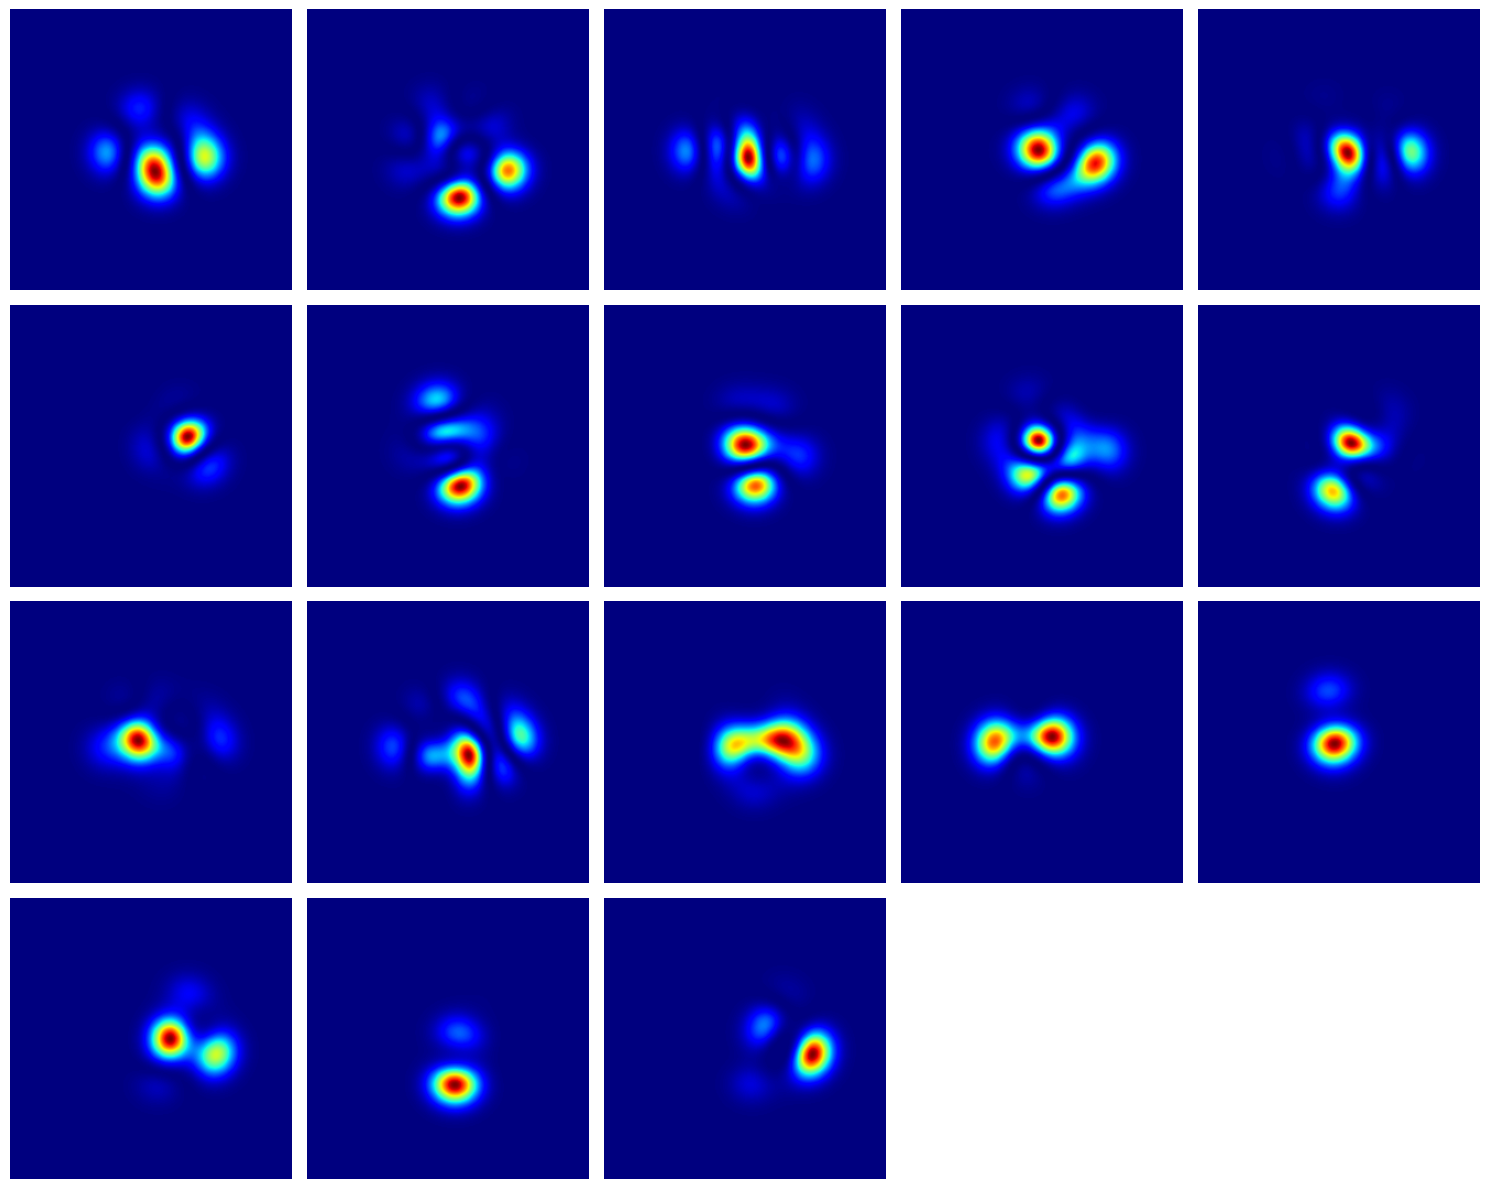

In [14]:
npz_file = '/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters/7847.npz'
npz_file = '/scratch/phys/sin/sethih1/data_files/old/second_group_images_256/7847.npz'
visualize_molecule(npz_file)

Visualizing molecule from /scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters/7847.npz...
(256, 256, 18)


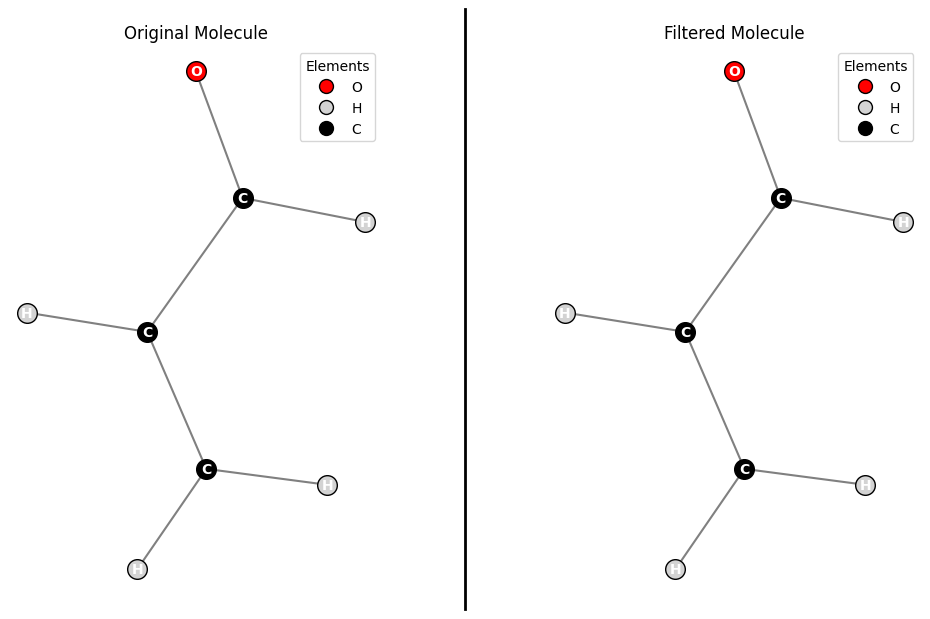

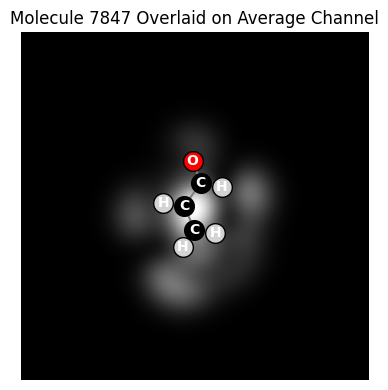

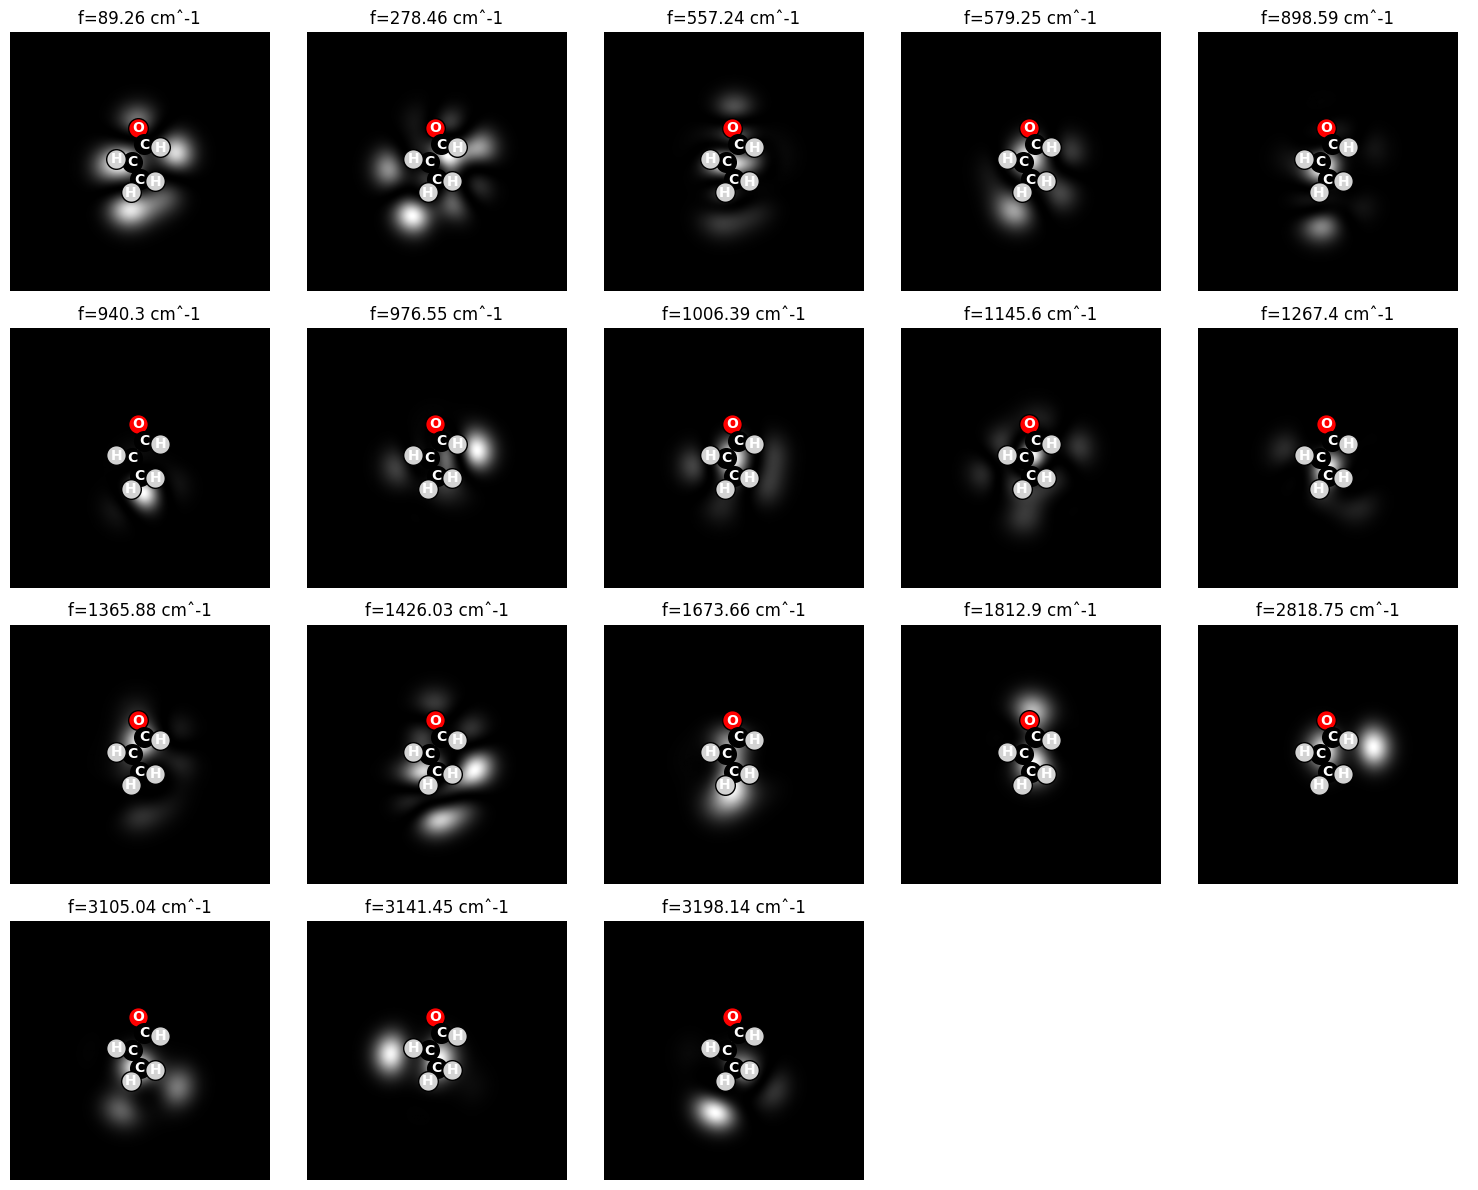

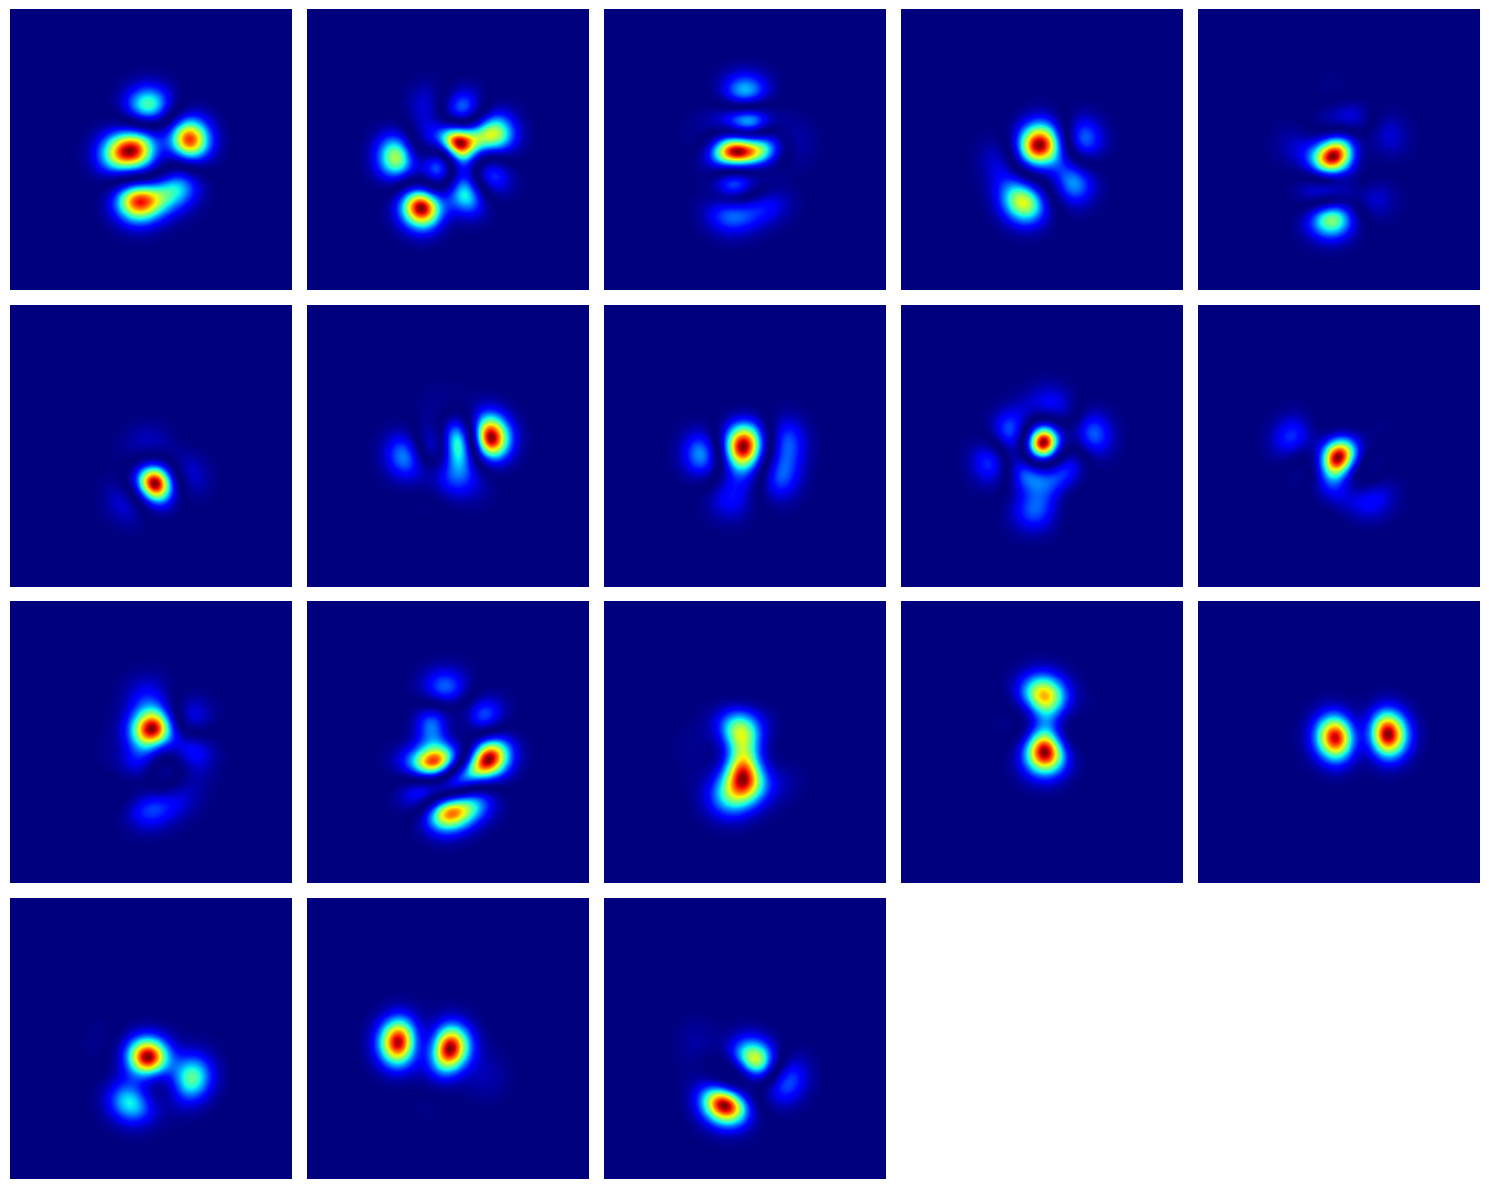

In [15]:
npz_file = '/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters/7847.npz'
visualize_molecule(npz_file)

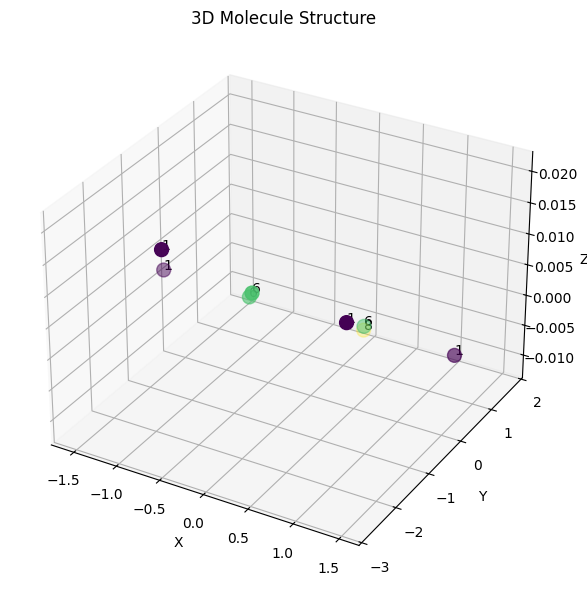

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_molecule_3d(atom_pos, atomic_numbers):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Use atomic number to define color
    scatter = ax.scatter(atom_pos[:, 0], atom_pos[:, 1], atom_pos[:, 2],
                         c=atomic_numbers, cmap='viridis', s=100)

    for i, num in enumerate(atomic_numbers):
        ax.text(atom_pos[i, 0], atom_pos[i, 1], atom_pos[i, 2],
                str(num), size=10, zorder=1, color='black')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("3D Molecule Structure")
    plt.tight_layout()
    plt.show()


npz_file = '/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters/7847.npz'

def read_npz(npz_file):
    with np.load(npz_file) as data:
            atom_pos = data['atom_pos']
            atomic_numbers = data['atomic_numbers']

    return atom_pos, atomic_numbers

atom_pos, atomic_numbers = read_npz(npz_file)
visualize_molecule_3d(np.array(atom_pos), np.array(atomic_numbers))

In [7]:
import py3Dmol


from ase.data import chemical_symbols


from IPython.display import HTML

def show_and_expose(view):
    """Display the py3Dmol view and expose it to JavaScript."""
    return HTML(f"""
    <div id="myviewer" style="width: 400px; height: 400px;"></div>
    <script>
        let viewer = $3Dmol.createViewer($("#myviewer"), {{backgroundColor: "white"}});
        viewer.addModel({repr(view.getModel().getMolString())}, "xyz");
        viewer.setStyle({{}}, {{stick:{{}}}});
        viewer.zoomTo();
        viewer.render();
        window.viewer = viewer; // 👈 expose it
    </script>
    """)


def to_xyz_string(atom_pos, atomic_numbers, comment='Generated molecule'):
    n_atoms = len(atomic_numbers)
    symbols = [chemical_symbols[z] for z in atomic_numbers]
    lines = [f"{symbols[i]} {atom_pos[i][0]} {atom_pos[i][1]} {atom_pos[i][2]}" for i in range(n_atoms)]
    return f"{n_atoms}\n{comment}\n" + "\n".join(lines)


def show_py3dmol(atom_pos, atomic_numbers):
    xyz_str = to_xyz_string(atom_pos, atomic_numbers)
    view = py3Dmol.view(width=400, height=400)
    view.addModel(xyz_str, 'xyz')
    view.setStyle({'stick': {}})
    view.setBackgroundColor("0x00000000")  # Transparent background
    view.zoomTo()
    view.show()
    
    show_and_expose(view)


show_py3dmol(atom_pos, atomic_numbers)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
npz_file = '/scratch/phys/sin/sethih1/data_files/all_group_plane_fchk_split_images_ters/7847.npz'
npz_file = '/scratch/phys/sin/sethih1/data_files/old/second_group_images_256/7847.npz'
atom_pos, atomic_numbers = read_npz(npz_file)

show_py3dmol(atom_pos, atomic_numbers)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
import numpy as np
import ase.data

def write_xyz(atom_pos, atomic_numbers, filename="molecule.xyz"):
    """
    Writes atom positions and atomic numbers to a .xyz file.
    
    Parameters:
    - atom_pos: Nx3 array of atomic positions
    - atomic_numbers: N array of atomic numbers
    - filename: Name of the output .xyz file
    """
    num_atoms = len(atom_pos)
    with open(filename, 'w') as f:
        f.write(f"{num_atoms}\n")
        f.write("Generated by script\n")
        for num, pos in zip(atomic_numbers, atom_pos):
            symbol = ase.data.chemical_symbols[num]
            f.write(f"{symbol} {pos[0]:.6f} {pos[1]:.6f} {pos[2]:.6f}\n")

write_xyz(atom_pos, atomic_numbers, "output.xyz")


In [62]:
%%javascript
// Save current py3Dmol viewer as PNG
let viewer = window.viewer || window.$3Dmol.getViewer();
viewer.render();
viewer.pngURI(function(uri) {
    let a = document.createElement('a');
    a.href = uri;
    a.download = "molecule_view.png";
    document.body.appendChild(a);%%javascript
let viewer = window.viewer;
if (viewer) {
    viewer.render();
    viewer.pngURI(function(uri) {
        let a = document.createElement('a');
        a.href = uri;
        a.download = "molecule_view.png";
        document.body.appendChild(a);
        a.click();
        document.body.removeChild(a);
    });
} else {
    alert("Viewer not found. Make sure it was exposed to window.viewer.");
}

    a.click();
    document.body.removeChild(a);
});


<IPython.core.display.Javascript object>

In [52]:
import numpy as np
from ase import Atoms
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
from ase.data import chemical_symbols

def save_molecule_image_png(atom_pos, atomic_numbers, filename='molecule.png'):
    """
    Save molecule as a .png image using ASE and matplotlib.
    
    Parameters:
    - atom_pos: (N, 3) numpy array of atomic positions
    - atomic_numbers: (N,) list or array of atomic numbers
    - filename: output .png filename
    """
    # Convert atomic numbers to symbols
    symbols = [chemical_symbols[z] for z in atomic_numbers]
    
    # Create ASE Atoms object
    molecule = Atoms(symbols=symbols, positions=atom_pos)

    # Plot and save
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_atoms(molecule, ax=ax, rotation=('45x,45y,0z'), radii=0.3, show_unit_cell=False)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Example usage:
save_molecule_image_png(atom_pos, atomic_numbers, 'my_molecule.png')
